In [10]:
import pandas as pd
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
import yfinance as yf
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")
from itertools import product

In [14]:
symbol = "EURUSD=X"
start = "2023-01-01"
end = "2024-01-01"

In [31]:
df = yf.download(symbol, start, end, interval='1').Close.to_frame()
df.rename(columns={"Close": "price"}, inplace=True)
df6 = df.resample('6h').mean()

df6

[*********************100%%**********************]  1 of 1 completed


,price
Datetime,
2023-01-02 00:00:00+00:00,1.0704
2023-01-02 06:00:00+00:00,1.0684
2023-01-02 12:00:00+00:00,1.0671
2023-01-02 18:00:00+00:00,1.0666
2023-01-03 00:00:00+00:00,1.0671
...,...
2023-12-28 18:00:00+00:00,1.1068
2023-12-29 00:00:00+00:00,1.1074
2023-12-29 06:00:00+00:00,1.1068


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1448 entries, 2023-01-02 00:00:00+00:00 to 2023-12-29 18:00:00+00:00
Freq: 6h
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1070 non-null   float64
dtypes: float64(1)
memory usage: 22.6 KB


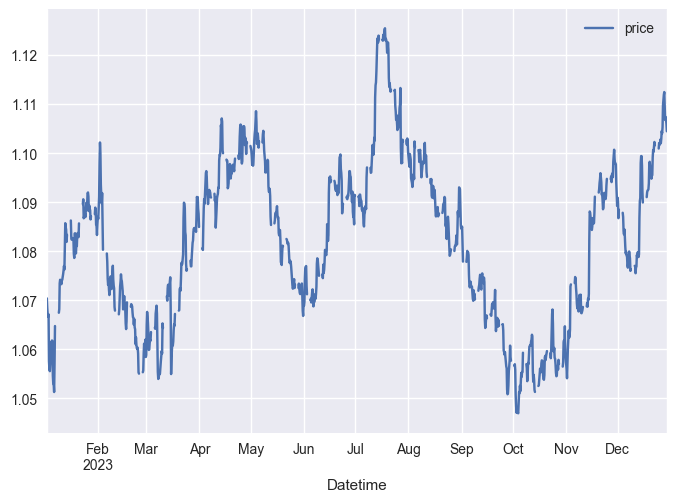

In [33]:
df6.info()
df6.plot()
plt.show()

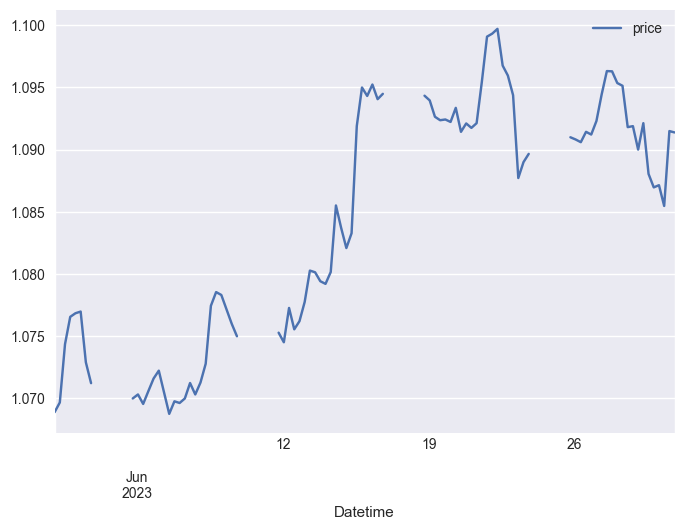

In [35]:
df6.loc['2023-06'].plot()
plt.show()

In [36]:
df6['returns'] = np.log(df6['price'].div(df6['price'].shift(1)))
df6

,price,returns
Datetime,,
2023-01-02 00:00:00+00:00,1.0704,NaN
2023-01-02 06:00:00+00:00,1.0684,-0.0018
2023-01-02 12:00:00+00:00,1.0671,-0.0012
2023-01-02 18:00:00+00:00,1.0666,-0.0005
2023-01-03 00:00:00+00:00,1.0671,0.0005
...,...,...
2023-12-28 18:00:00+00:00,1.1068,-0.0023
2023-12-29 00:00:00+00:00,1.1074,0.0005
2023-12-29 06:00:00+00:00,1.1068,-0.0005


In [37]:
df6.dropna(inplace=True)
df6

,price,returns
Datetime,,
2023-01-02 06:00:00+00:00,1.0684,-0.0018
2023-01-02 12:00:00+00:00,1.0671,-0.0012
2023-01-02 18:00:00+00:00,1.0666,-0.0005
2023-01-03 00:00:00+00:00,1.0671,0.0005
2023-01-03 06:00:00+00:00,1.0576,-0.0090
...,...,...
2023-12-28 18:00:00+00:00,1.1068,-0.0023
2023-12-29 00:00:00+00:00,1.1074,0.0005
2023-12-29 06:00:00+00:00,1.1068,-0.0005


In [44]:
df6

,price,returns
Datetime,,
2023-01-02 06:00:00+00:00,1.0684,-0.0018
2023-01-02 12:00:00+00:00,1.0671,-0.0012
2023-01-02 18:00:00+00:00,1.0666,-0.0005
2023-01-03 00:00:00+00:00,1.0671,0.0005
2023-01-03 06:00:00+00:00,1.0576,-0.0090
...,...,...
2023-12-28 18:00:00+00:00,1.1068,-0.0023
2023-12-29 00:00:00+00:00,1.1074,0.0005
2023-12-29 06:00:00+00:00,1.1068,-0.0005


In [48]:
df20 = df.resample('20min').mean().ffill()
df20

,price
Datetime,
2023-01-02 00:00:00+00:00,1.0709
2023-01-02 00:20:00+00:00,1.0709
2023-01-02 00:40:00+00:00,1.0709
2023-01-02 01:00:00+00:00,1.0707
2023-01-02 01:20:00+00:00,1.0707
...,...
2023-12-29 20:40:00+00:00,1.1044
2023-12-29 21:00:00+00:00,1.1040
2023-12-29 21:20:00+00:00,1.1040


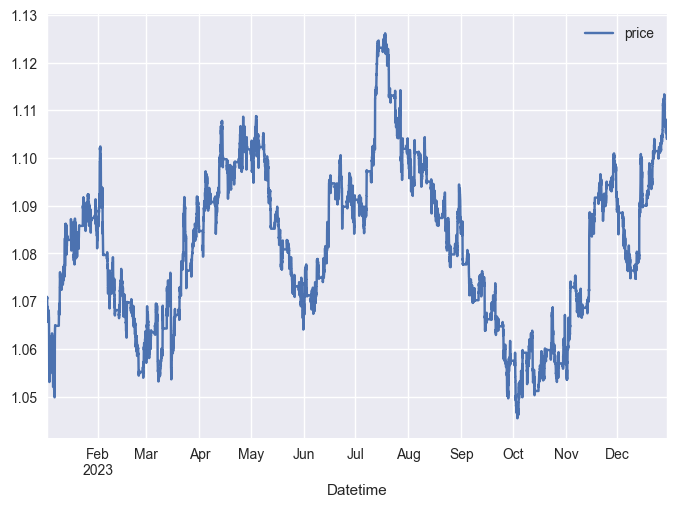

In [51]:
df20.plot()
plt.show()

In [63]:
window = 3
df['returns'] = np.log(df['price'].div(df['price'].shift(1)))
df['returns'].rolling(window=window).mean()
df['position'] = - np.sign(df['returns'].rolling(window=window).mean())
df

,price,returns,position,strategy
Datetime,,,,
2023-01-02 00:00:00+00:00,1.0709,NaN,NaN,NaN
2023-01-02 01:00:00+00:00,1.0707,-0.0002,NaN,NaN
2023-01-02 02:00:00+00:00,1.0704,-0.0002,NaN,NaN
2023-01-02 03:00:00+00:00,1.0709,0.0004,-1.0000,NaN
2023-01-02 04:00:00+00:00,1.0701,-0.0007,1.0000,0.0007
...,...,...,...,...
2023-12-29 18:00:00+00:00,1.1055,-0.0013,-1.0000,-0.0013
2023-12-29 19:00:00+00:00,1.1044,-0.0010,1.0000,0.0010
2023-12-29 20:00:00+00:00,1.1044,0.0000,1.0000,0.0000


In [64]:
df['strategy'] = df.position.shift(1) * df.returns

,price,returns,position,strategy
Datetime,,,,
2023-01-02 00:00:00+00:00,1.0709,NaN,NaN,NaN
2023-01-02 01:00:00+00:00,1.0707,-0.0002,NaN,NaN
2023-01-02 02:00:00+00:00,1.0704,-0.0002,NaN,NaN
2023-01-02 03:00:00+00:00,1.0709,0.0004,-1.0000,NaN
2023-01-02 04:00:00+00:00,1.0701,-0.0007,1.0000,0.0007
...,...,...,...,...
2023-12-29 18:00:00+00:00,1.1055,-0.0013,-1.0000,-0.0013
2023-12-29 19:00:00+00:00,1.1044,-0.0010,1.0000,0.0010
2023-12-29 20:00:00+00:00,1.1044,0.0000,1.0000,0.0000


In [65]:
df[['returns', 'strategy']].sum()

returns     0.0304
strategy   -0.0099
dtype: float64

In [66]:
df[['returns', 'strategy']].sum().apply(np.exp)

returns    1.0309
strategy   0.9902
dtype: float64

In [67]:
df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)
df

,price,returns,position,strategy,creturns,cstrategy
Datetime,,,,,,
2023-01-02 00:00:00+00:00,1.0709,NaN,NaN,NaN,NaN,NaN
2023-01-02 01:00:00+00:00,1.0707,-0.0002,NaN,NaN,0.9998,NaN
2023-01-02 02:00:00+00:00,1.0704,-0.0002,NaN,NaN,0.9996,NaN
2023-01-02 03:00:00+00:00,1.0709,0.0004,-1.0000,NaN,1.0000,NaN
2023-01-02 04:00:00+00:00,1.0701,-0.0007,1.0000,0.0007,0.9993,1.0007
...,...,...,...,...,...,...
2023-12-29 18:00:00+00:00,1.1055,-0.0013,-1.0000,-0.0013,1.0323,0.9895
2023-12-29 19:00:00+00:00,1.1044,-0.0010,1.0000,0.0010,1.0313,0.9905
2023-12-29 20:00:00+00:00,1.1044,0.0000,1.0000,0.0000,1.0313,0.9905


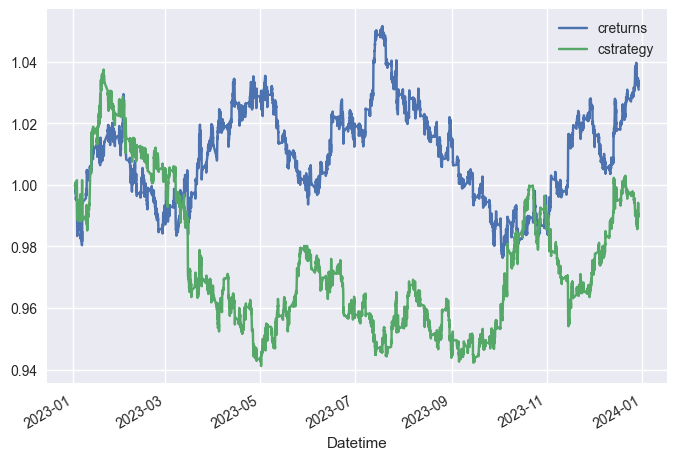

In [69]:
df[['creturns', 'cstrategy']].plot()
plt.show()

In [71]:
df['momentum_position'] = - df['position']
df['momentum_strategy'] = df.momentum_position.shift(1) * df.returns
df['cmomentum_strategy'] = df['momentum_strategy'].cumsum().apply(np.exp)
df


,price,returns,position,strategy,creturns,cstrategy,momentum_position,momentum_strategy,cmomentum_strategy
Datetime,,,,,,,,,
2023-01-02 00:00:00+00:00,1.0709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-02 01:00:00+00:00,1.0707,-0.0002,NaN,NaN,0.9998,NaN,NaN,NaN,NaN
2023-01-02 02:00:00+00:00,1.0704,-0.0002,NaN,NaN,0.9996,NaN,NaN,NaN,NaN
2023-01-02 03:00:00+00:00,1.0709,0.0004,-1.0000,NaN,1.0000,NaN,1.0000,NaN,NaN
2023-01-02 04:00:00+00:00,1.0701,-0.0007,1.0000,0.0007,0.9993,1.0007,-1.0000,-0.0007,0.9993
...,...,...,...,...,...,...,...,...,...
2023-12-29 18:00:00+00:00,1.1055,-0.0013,-1.0000,-0.0013,1.0323,0.9895,1.0000,0.0013,1.0106
2023-12-29 19:00:00+00:00,1.1044,-0.0010,1.0000,0.0010,1.0313,0.9905,-1.0000,-0.0010,1.0096
2023-12-29 20:00:00+00:00,1.1044,0.0000,1.0000,0.0000,1.0313,0.9905,-1.0000,-0.0000,1.0096


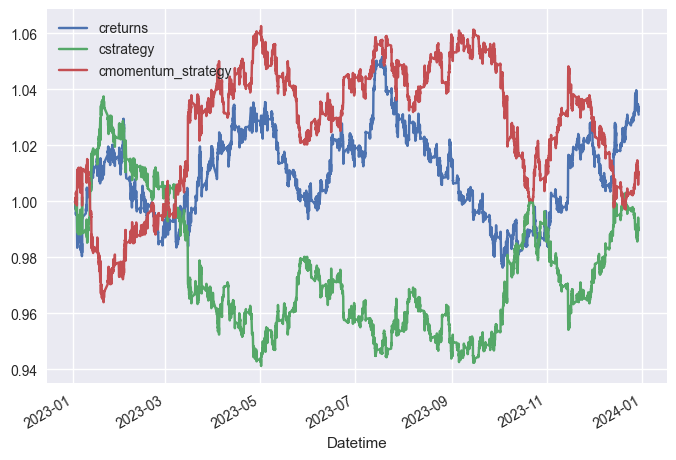

In [72]:
df[['creturns', 'cstrategy', 'cmomentum_strategy']].plot()
plt.show()